# Parkinsons

In [1]:
import pandas as pd
import ehrapy as ep
import ehrdata as ed
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.names

Nothing to do - goodbye
Nothing to do - goodbye


# Data Wrangling

In [4]:
data = pd.read_csv("parkinsons.data", sep=",")

Since the dataset does not have a measurement ID we add one.

In [5]:
data["measurement_id"] = range(1, len(data) + 1)

In [6]:
data.set_index("measurement_id", inplace=True)

In [7]:
data.to_csv("parkinsons_prepared.csv")

## ehrapy sanity check

In [8]:
adata = ep.io.read_csv("parkinsons_prepared.csv",
                   columns_obs_only=["name"],
                   index_column="measurement_id")
edata = ed.EHRData.from_adata(adata=adata)


In [9]:
edata=ep.pp.encode(edata,autodetect=True)

! Feature 'status' was detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.
! Detected no columns that need to be encoded. Leaving passed AnnData object unchanged.


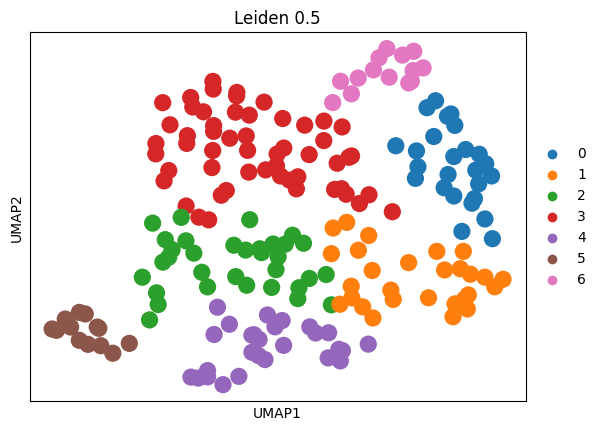

In [10]:
ep.pp.scale_norm(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")